In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

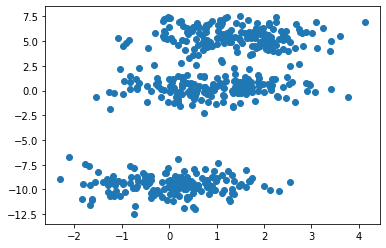

In [2]:
n_samples = 500

X, labels = datasets.make_blobs(n_samples=n_samples)
x_1 = X.T[0]
x_2 = X.T[1]

plt.scatter(x_1, x_2)
plt.show()

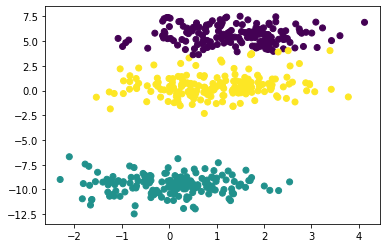

In [3]:
k = 3
n_attempts = 20

best_output = []
best_sum_variances = None

for i in range(n_attempts):
    random_indices = np.random.randint(0, n_samples, k)
    output = []
    variances = {}
    for index in range(0, n_samples):
        x, y = x_1[index], x_2[index]

        distances = []
        for random_index in random_indices:
            x_r, y_r = x_1[random_index], x_2[random_index]
            distances.append(np.sqrt(np.square(x-x_r) + np.square(y-y_r)))

        lowest_index_distance = np.argmin(distances)
        lowest_variance = np.amin(distances)
        variances[lowest_index_distance] = variances.get(lowest_index_distance, 0) +  lowest_variance
        output.append(np.argmin(distances))
    sum_variances = sum(variances.values())
    
    if best_sum_variances is None:
        best_sum_variances = sum_variances
        best_output = output
    elif sum_variances < best_sum_variances:
        best_sum_variances = sum_variances
        best_output = output

plt.scatter(x_1, x_2, c=best_output)
plt.show()